# Statistics and Probability - Final Project

Marie Cieslar, Gaia Iori, Marta Maria Laskowska, Javiera Andrea Rubio Di Biase

### Table of Content
1. Data Cleaning <br> 
<br>
    1.1 Handling Outliers and Missing Values <br>
    1.2 Other Data Cleaning <br>
    <br>
2. Explotatory Data Analysis (EDA)


In [57]:
# Loading neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr, norm
import geopandas as gpd
import contextily as ctx
from matplotlib import gridspec
from shapely.geometry import Point
from scipy.stats import f_oneway, chi2_contingency, chi2
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', None)

## 1. Data Cleaning
### 1.1 Handling Outliers and Missing Values 

In [2]:
# Load dataset
housing_data = pd.read_csv("housing.csv")

# Visualize the dataset
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [3]:
len(housing_data)

13580

### Data types

In [4]:
housing_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
# Change columns to appropriate data types
housing_data['Date'] = pd.to_datetime(housing_data['Date'], format='%d/%m/%Y', errors='coerce')
housing_data['YearBuilt'] = pd.to_numeric(housing_data['YearBuilt'], errors='coerce').astype('Int64')
housing_data['Postcode'] = pd.to_numeric(housing_data['Postcode'], errors='coerce').astype('Int64')
housing_data['Bedroom2'] = pd.to_numeric(housing_data['Bedroom2'], errors='coerce').astype('Int64')
housing_data['Bathroom'] = pd.to_numeric(housing_data['Bathroom'], errors='coerce').astype('Int64')
housing_data['Car'] = pd.to_numeric(housing_data['Car'], errors='coerce').astype('Int64')
housing_data['Propertycount'] = pd.to_numeric(housing_data['Propertycount'], errors='coerce').astype('Int64')

### Detection of columns with missing data

In [6]:
missing_columns = housing_data.columns[housing_data.isnull().any()]
missing_columns_list = missing_columns.tolist()
missing_columns_list

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

### Detection of outliers

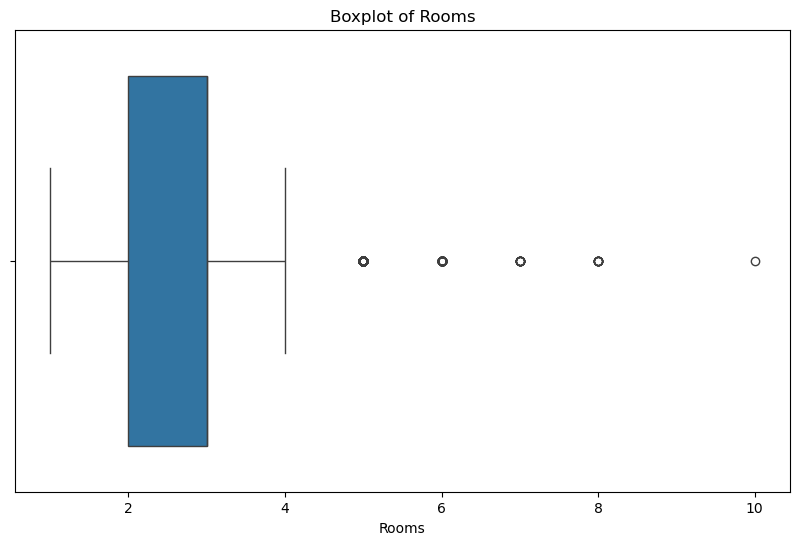

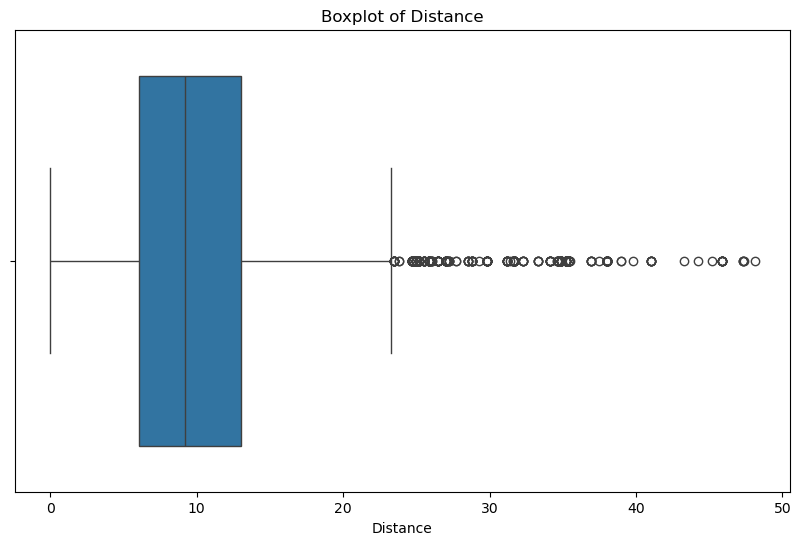

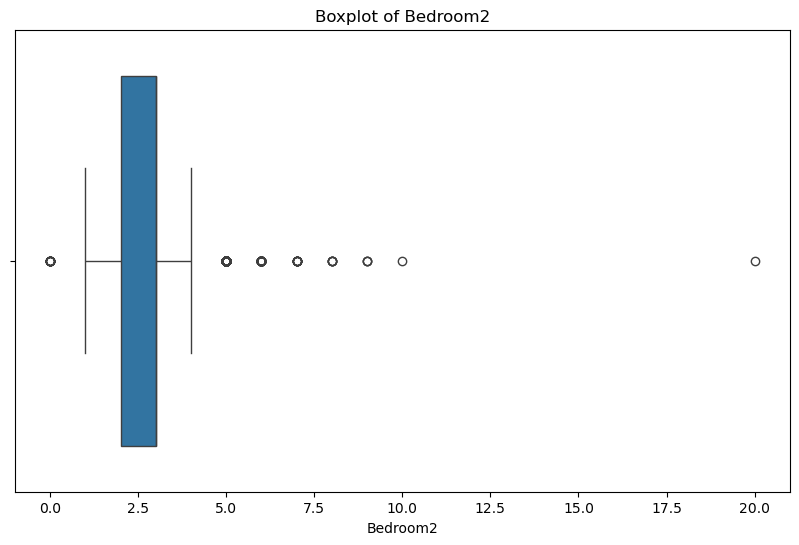

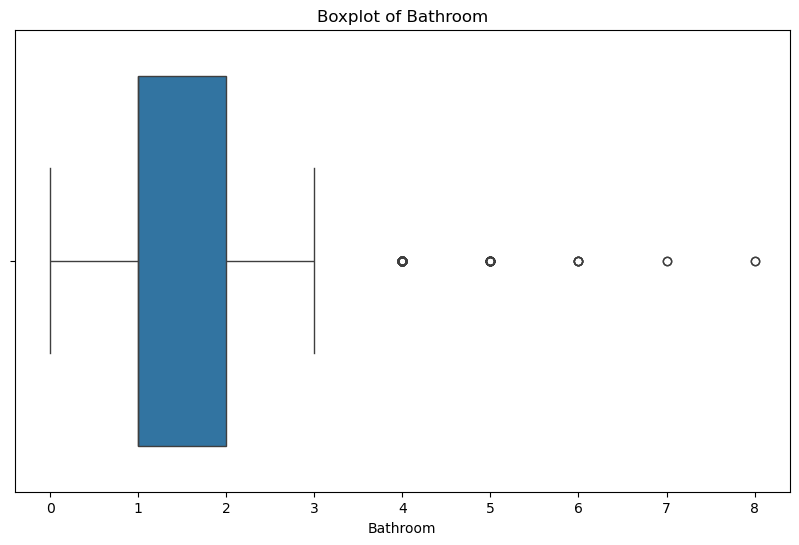

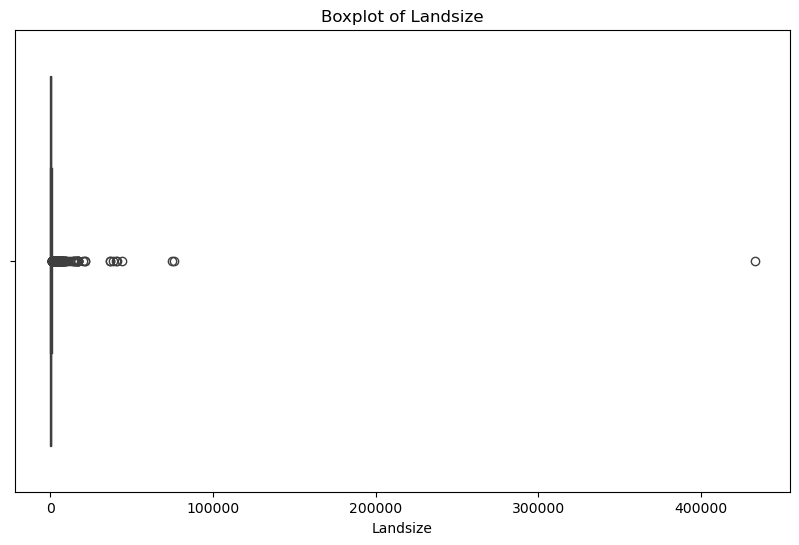

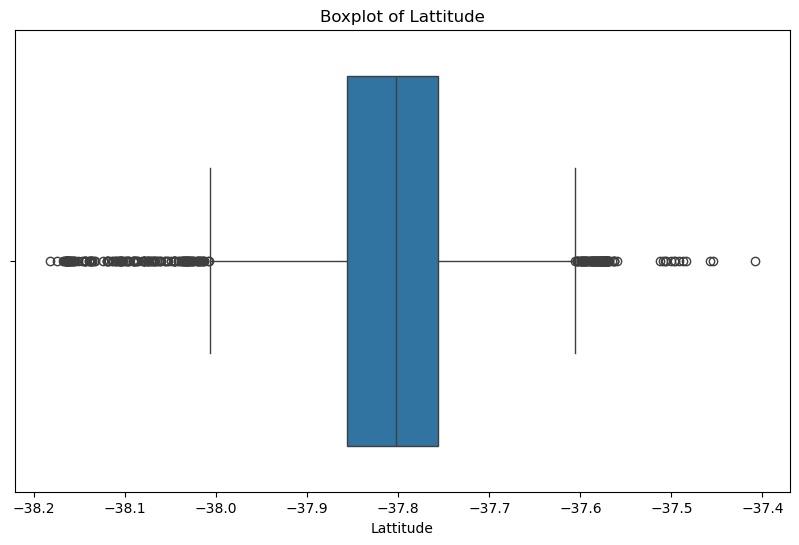

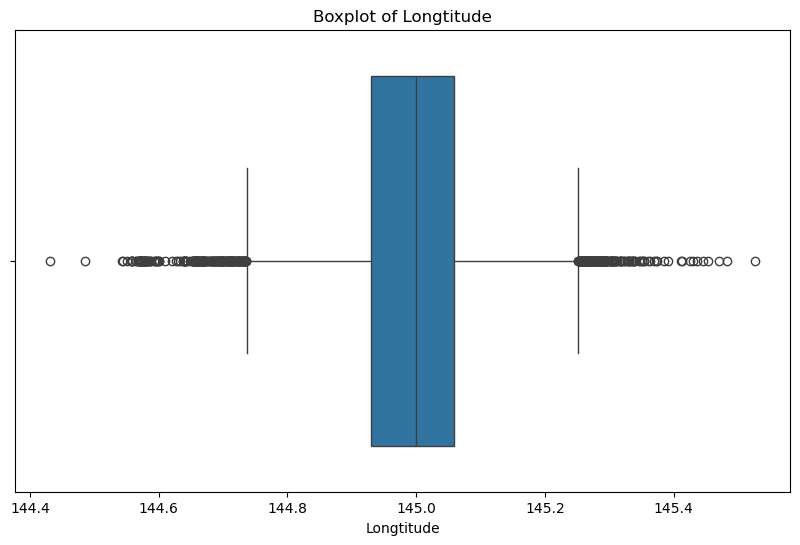

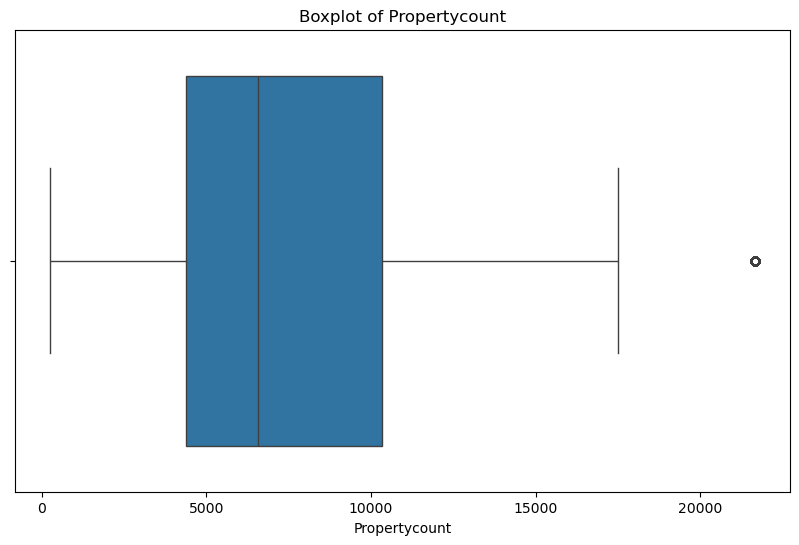

In [7]:
numeric_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    if column not in ['Price', 'Postcode', 'Car', 'BuildingArea', 'YearBuilt', 'Land_price_per_m2', 'Building_and_land_price_per_m2', 'YearSold']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=housing_data, x=column)
        plt.title(f'Boxplot of {column}')
        plt.show()

#### Car

In [8]:
# Create a data frame without NaN values in the 'Car' column
car_notna = housing_data[housing_data['Car'].notna()]

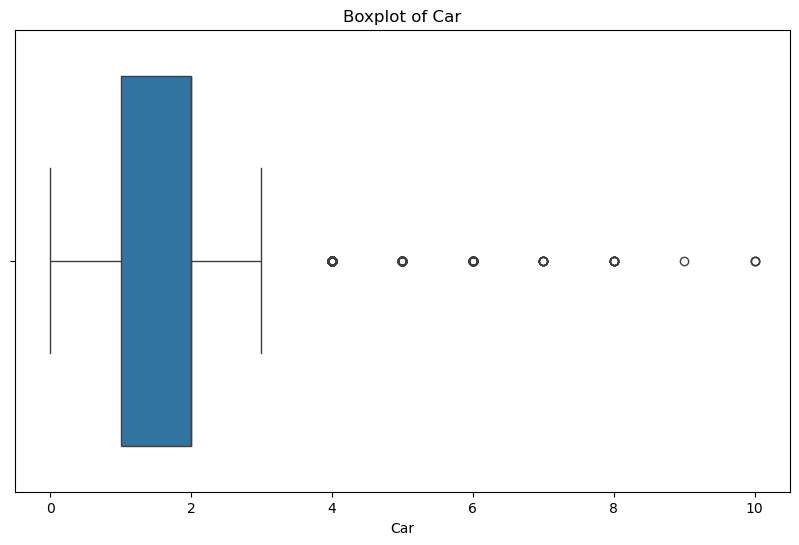

In [9]:
# Boxplot of 'Car' column (without NaN values)
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_notna, x='Car')
plt.title(f'Boxplot of Car')
plt.show()

#### BuildingArea

In [10]:
# Create a data frame without NaN values in the 'BuildingArea' column
building_area_notna = housing_data[housing_data['BuildingArea'].notna()]

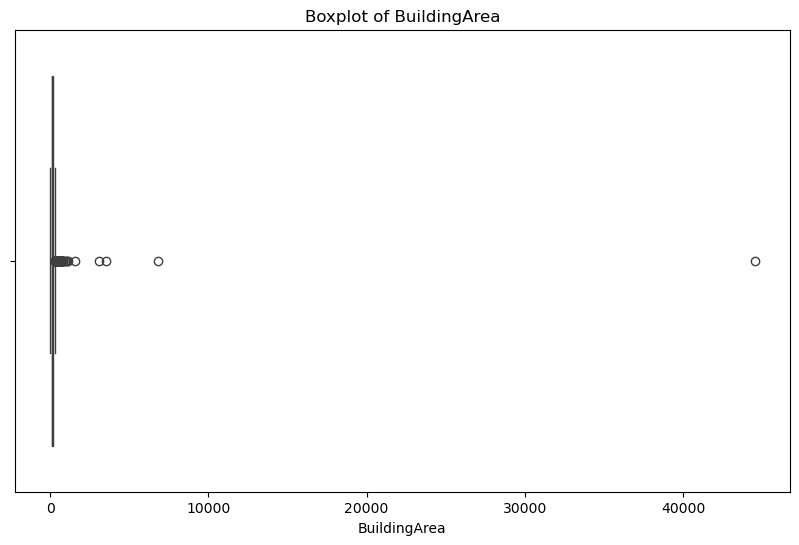

In [11]:
# Boxplot of 'BuildingArea' column (without NaN values)
plt.figure(figsize=(10, 6))
sns.boxplot(data=building_area_notna, x='BuildingArea')
plt.title(f'Boxplot of BuildingArea')
plt.show()

#### YearBuilt

In [12]:
# Create a data frame without NaN values in the 'YearBuilt' column
year_built_notna = housing_data[housing_data['BuildingArea'].notna()]

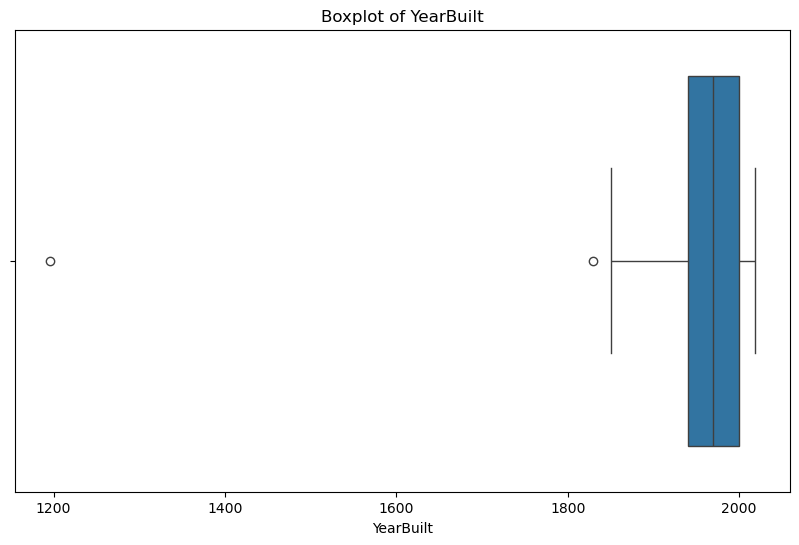

In [13]:
# Boxplot of 'YearBuilt' column (without NaN values)
plt.figure(figsize=(10, 6))
sns.boxplot(data=year_built_notna, x='YearBuilt')
plt.title(f'Boxplot of YearBuilt')
plt.show()

### Univariate Analysis

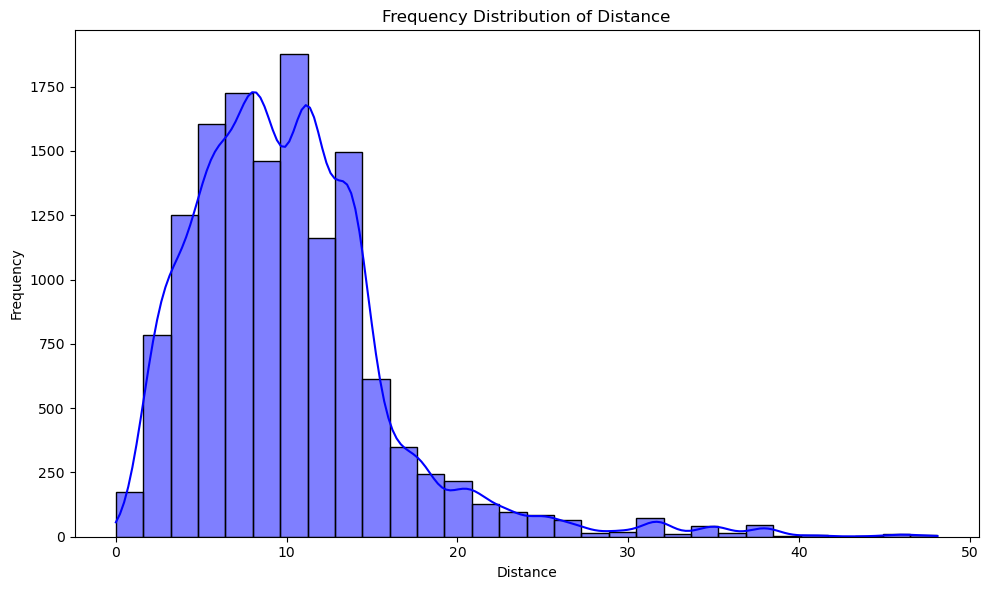

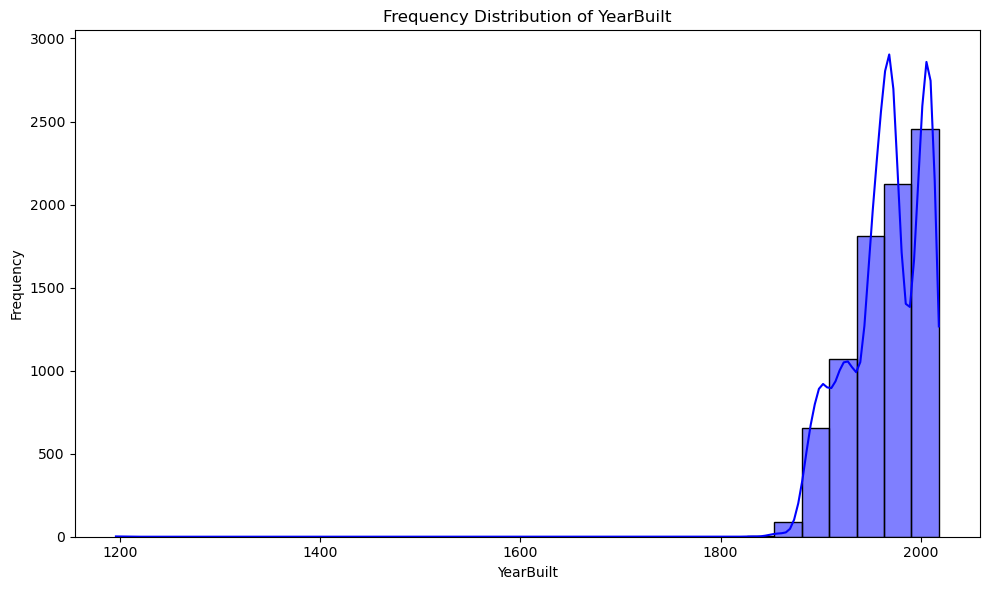

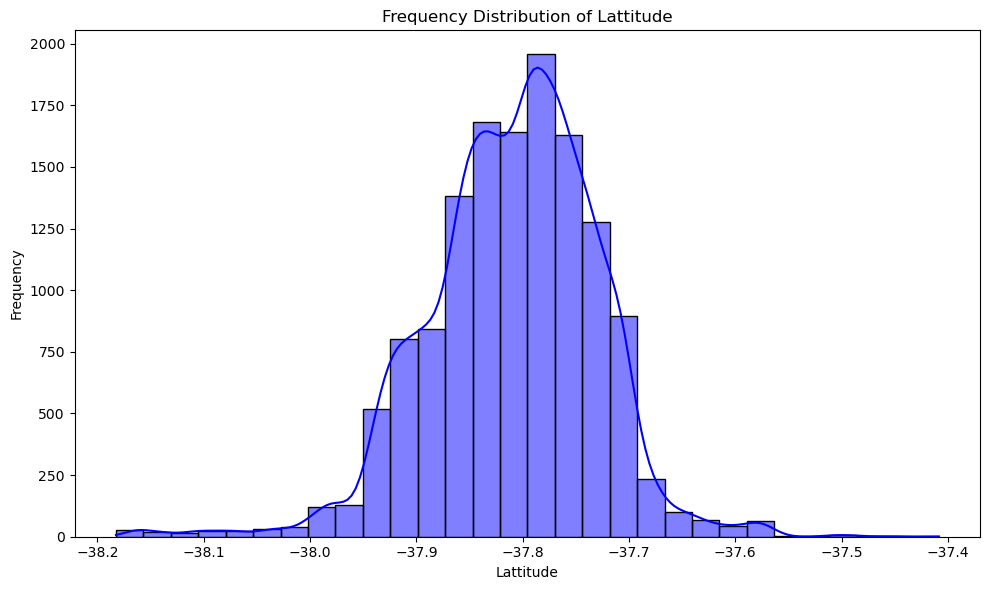

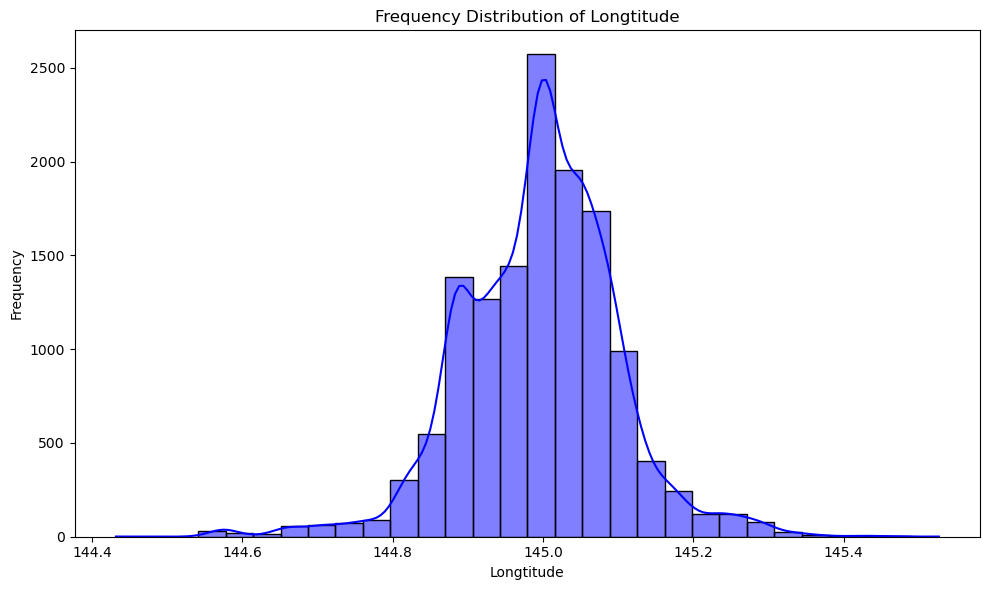

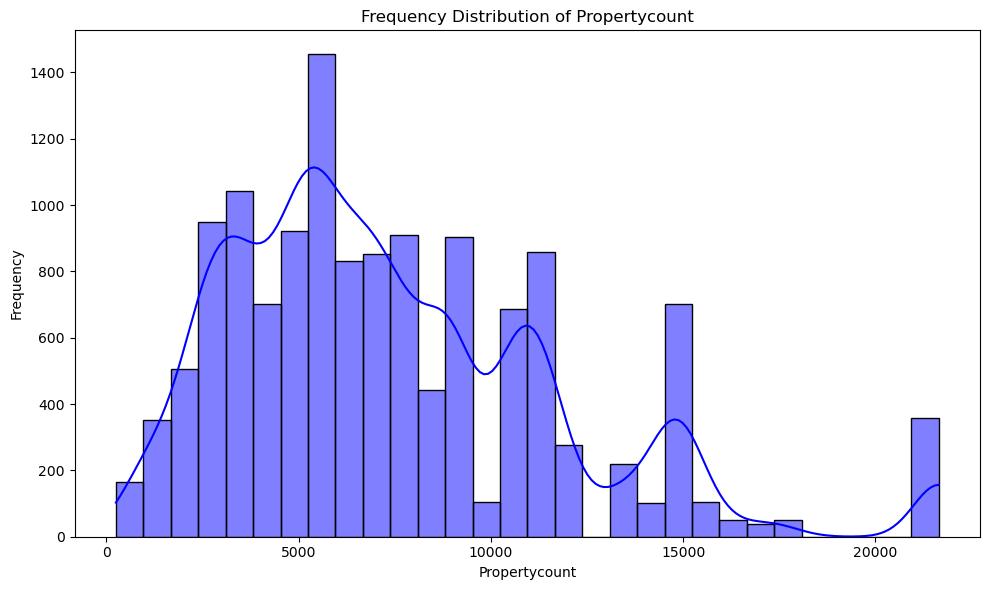

In [14]:
columns_to_plot = ['Distance', 'YearBuilt', 
                   'Lattitude', 'Longtitude', 'Propertycount']

# Create frequency distribution plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=housing_data, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis

Price vs. Type of property

/var/folders/d7/grxt144d6wz6r6mqxx6jmqwm0000gn/T/ipykernel_58083/514562247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')


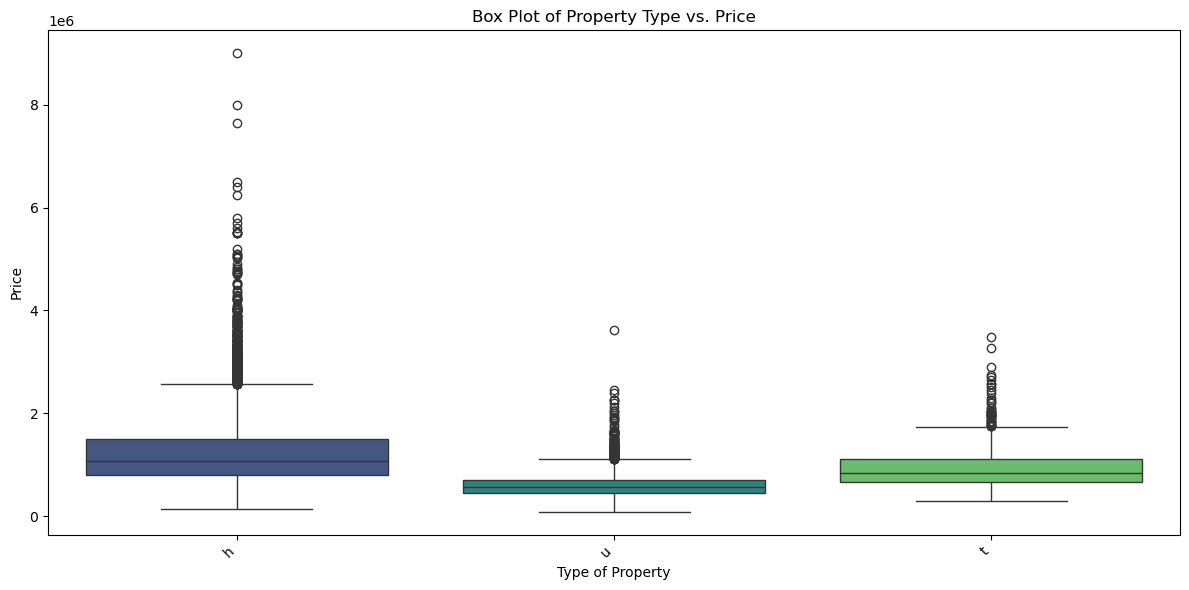

In [15]:
# Create a boxplot of 'Type' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')
plt.title('Box Plot of Property Type vs. Price')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Method vs. Price

/var/folders/d7/grxt144d6wz6r6mqxx6jmqwm0000gn/T/ipykernel_58083/3870213309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')


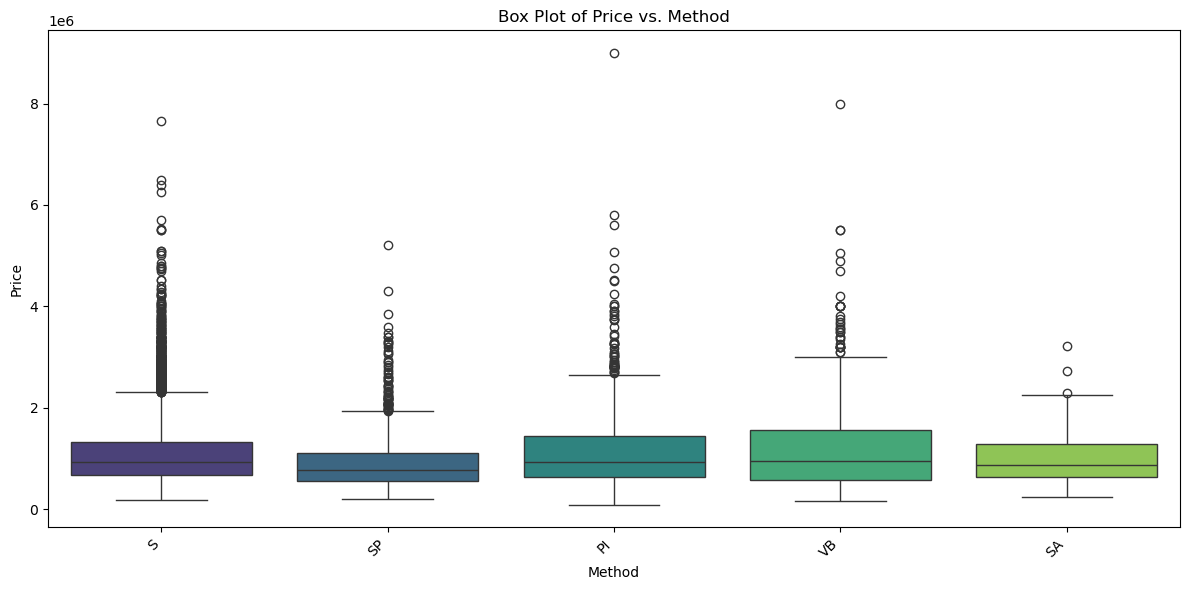

In [16]:
# Create a boxplot of 'Method' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Method')
plt.xlabel('Method')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Region Name vs. Price

/var/folders/d7/grxt144d6wz6r6mqxx6jmqwm0000gn/T/ipykernel_58083/3116850447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')


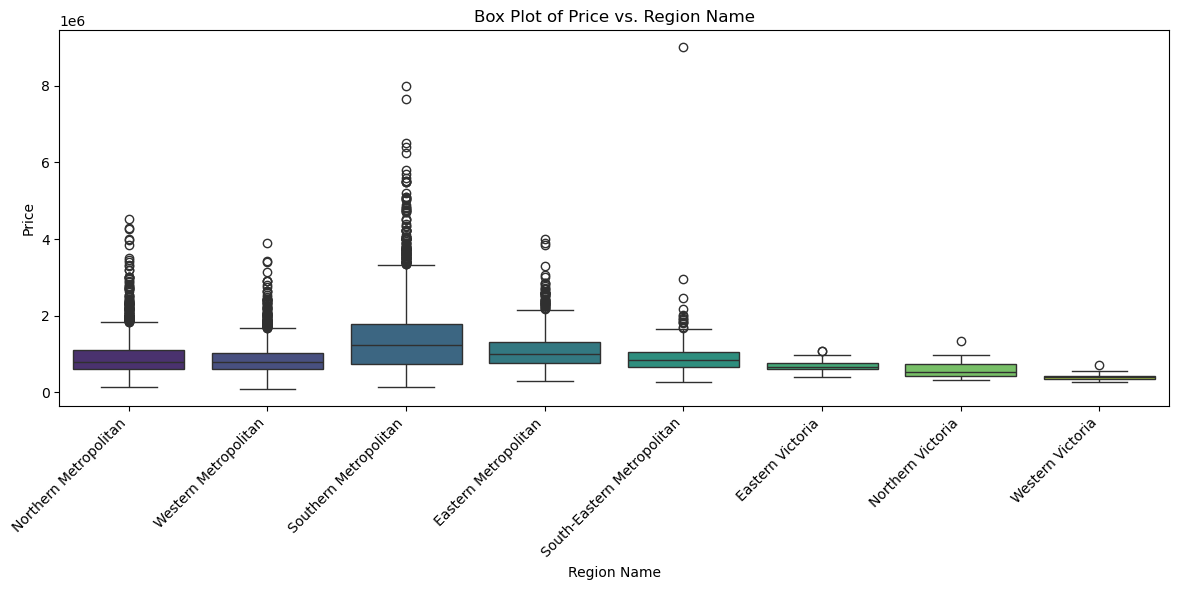

In [17]:
# Create a boxplot of 'Regionname' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Region Name')
plt.xlabel('Region Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bedroom2 vs Price

/var/folders/d7/grxt144d6wz6r6mqxx6jmqwm0000gn/T/ipykernel_58083/421285732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')


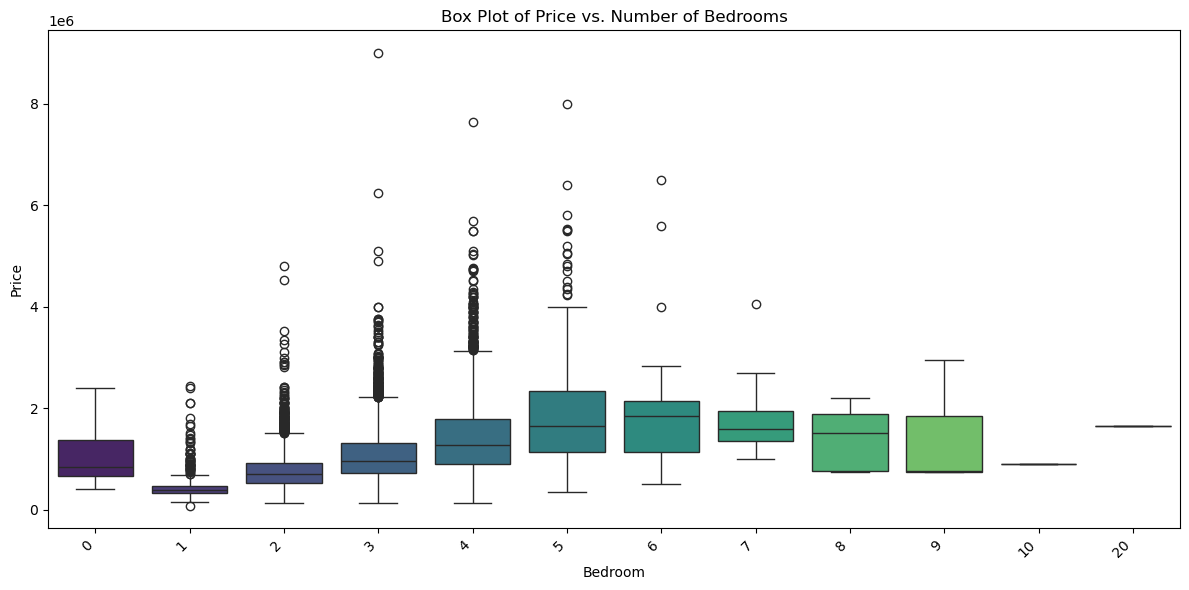

In [18]:
# Create a boxplot of 'CouncilArea' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bedrooms')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bathrooms vs. Price

/var/folders/d7/grxt144d6wz6r6mqxx6jmqwm0000gn/T/ipykernel_58083/4105496214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')


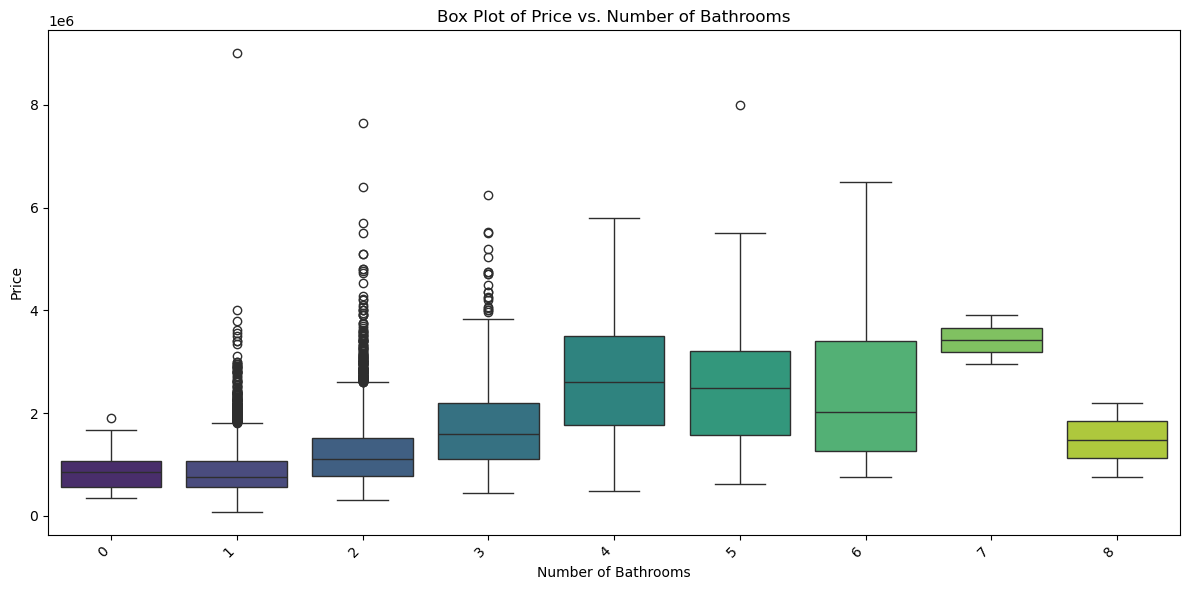

In [19]:
# Boxplot of 'Bathroom' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

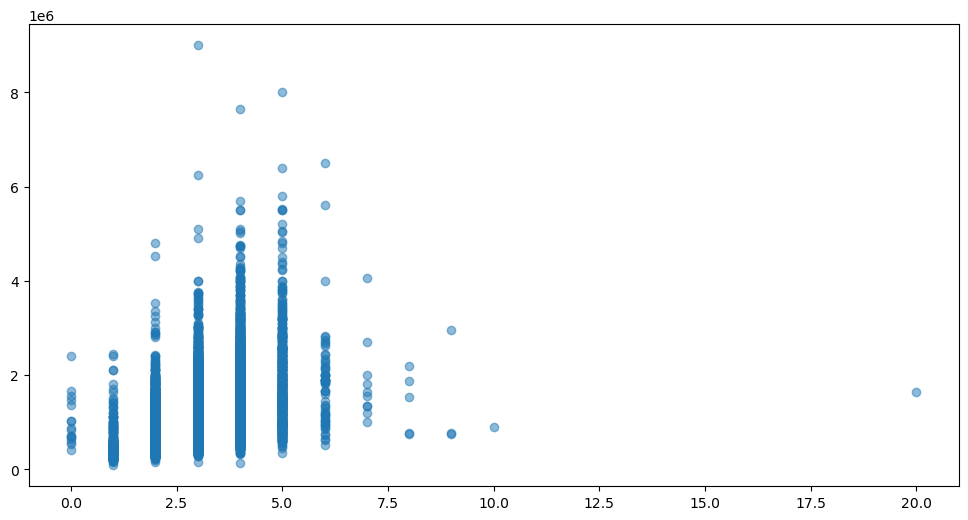

In [20]:
plt.figure(figsize=(12, 6))
sns.regplot(data=housing_data, x='Bedroom2', y='Price', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line: Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Price vs Car Space

In [21]:
# Create a boxplot of 'Car' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Car', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Car Parking Spaces')
plt.xlabel('Car')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TypeError: boolean value of NA is ambiguous

<Figure size 1200x600 with 0 Axes>

Average Housing Prices by Region - **before data imputation**

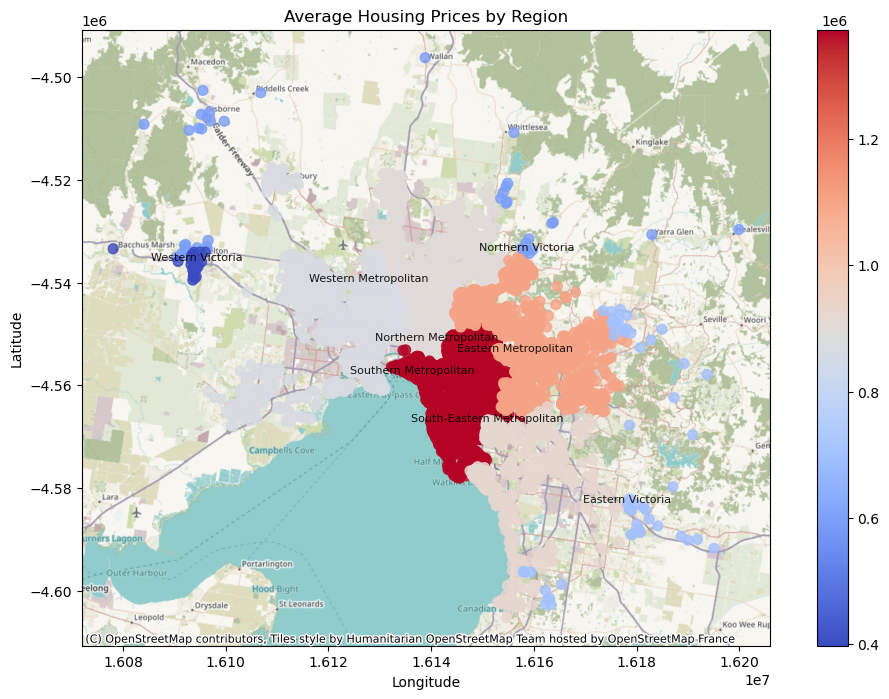

In [ ]:
# Step 1: Drop rows with missing values for specified columns
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 2: Calculate the average price per region
average_price_per_region = housing_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 3: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326"
)

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

# Step 5: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=50, alpha=0.8)

# Add a single label for each region by dropping duplicate labels based on 'Regionname'
unique_labels = gdf.drop_duplicates(subset='Regionname')
for x, y, label in zip(unique_labels.geometry.x, unique_labels.geometry.y, unique_labels['Regionname']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black', alpha=0.9)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Spatial Distribution of Property Prices in Equally Thick Rings from CBD - **before data imputation**

***RING PART IS MISSING!!!!**

### Filtering outliers using upper and lower bound

In [22]:
def finding_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# 'LandSize' outliers
outliers_landsize = finding_outliers(housing_data, 'Landsize')
print(outliers_landsize['Landsize'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_landsize['Landsize'].count())
print('\n\n')

# 'YearBuilt' outliers
outliers_yearbuilt = finding_outliers(housing_data, 'YearBuilt')
print(outliers_yearbuilt['YearBuilt'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_yearbuilt['YearBuilt'].count())

11020    433014.0
10504     76000.0
687       75100.0
13245     44500.0
5194      41400.0
           ...   
11302      1388.0
4028       1388.0
9976       1382.0
5616       1369.0
656        1364.0
Name: Landsize, Length: 368, dtype: float64 

 sum of outliers: 368



2554    1850
4843    1850
5405    1850
5860    1850
2079    1830
9968    1196
Name: YearBuilt, dtype: Int64 

 sum of outliers: 6


In [23]:
# Identify the indices of the outliers
outliers_indices = set(outliers_landsize.index).union(set(outliers_yearbuilt.index))

# Remove the outliers from the original dataset
housing_data_no_outliers = housing_data.drop(index=outliers_indices).reset_index(drop=True)

# Display the cleaned dataset
housing_data_no_outliers.head()

housing_data = housing_data_no_outliers

### Handling Missing Data

In [24]:
print("\nPre-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_percentage = missing_percentage.round(2)
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)



Pre-Cleaning Missing Data:


Missing Count  Missing Percentage
BuildingArea           6258               47.38
YearBuilt              5232               39.62
CouncilArea            1333               10.09
Car                      59                0.45

### Identifying Patterns of Missingness

#### Patterns of Missingness
**MCAR (Missing Completely at Random)** <br>
Missing values are entirely random, unrelated to other variables or the missing variable itself.

**MAR (Missing at Random)** <br>
Missingness is related to other observed variables but not the missing variable.

**MNAR (Missing Not at Random)** <br>
Missingness is related to the value of the variable itself.

#### Missing Data Visulization

**Heatmap of Missing Data** <br>

The heatmap of missing data shows that missing values are scattered across the features Car, BuildingArea, YearBuilt, and CouncilArea, with some clustering in specific rows, indicating potential patterns in missingness.


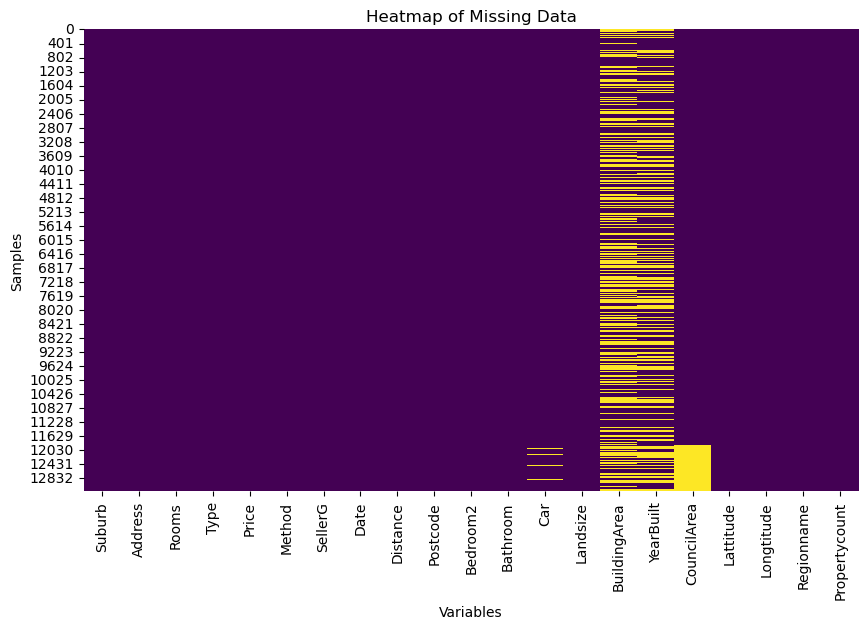

In [25]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.xlabel("Variables")
plt.ylabel("Samples")
plt.show()

**Correlation Matrix of Missingness between Variables** <br>

The correlation matrix shows a strong positive correlation (0.77) between the missingness of 'BuildingArea' and 'YearBuilt', suggesting that missing values in these two variables are likely related, potentially due to shared data collection or record-keeping processes. Other variables, such as 'Car' and 'CouncilArea', show weak or no correlations, indicating independent missingness patterns.

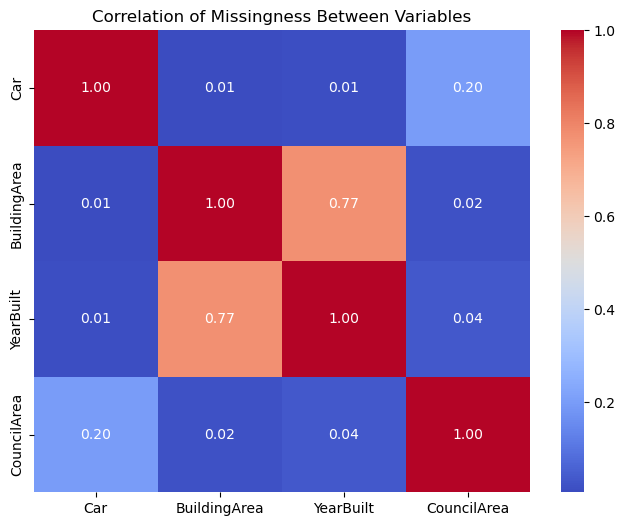

In [26]:
# Correlation Matrix of between Variables with missing data
def plot_missingness_correlation(data, features_with_missingness):
    missing_corr = data[features_with_missingness].isnull().astype(int).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation of Missingness Between Variables")
    plt.show()

features_with_missingness = ["Car", "BuildingArea", "YearBuilt", "CouncilArea"]
plot_missingness_correlation(housing_data, features_with_missingness)


From these reuslts we can infer the following patterns for the four variables:

**'Car', 'CouncilArea':  MCAR** <br>
The variables 'Car' and 'CouncilArea' have very weak or no correlations in the heatmap indicating MCAR.

**'YearBuilt' and 'BuildingArea': MAR** <br>
Correlations between missing values (e.g., 0.77 correlation between BuildingArea and YearBuilt) suggest a MAR pattern. Missing 'BuildingArea' might be explained by 'YearBuilt' (e.g., older properties may lack recorded building areas).

**Statistical Tests to check MAR assumption** <br>

There are multiple ways to test our assumptions on the type of missingness.

A very common one being Little's MCAR test. However, for large data sets, such as the one at hand, it is unsuitable due to computational complexity and the exponential growth of unique missingness patterns, making the calculations impractical and prone to errors. The high degree of freedom in the large dataset at hand leads to a lack of sensitivty of the chi-square test, resulting in a misleadingly high p-value. For large datasets, alternative methods such as subgroup analysis or visualizing missingness patterns are often more reliable. Thus, we will proceed to analyze the type of missingness using Chi-Square Tests, to test for independence between 'Building Area' and 'YearBuilt'

**Chi-Square Tests for Independence** <br>

We will run a Chi-Square Tests for Independence to test if the missingness of 'BuildinArea' is independent of 'YearBuilt' as a correlation is suggested in the correlation matrix.

In [27]:
# Create missingness indicator for a variable
housing_data['BuildingArea_missing'] = housing_data['BuildingArea'].isnull().astype(int)

# Perform chi-square test against another observed variable
contingency_table = pd.crosstab(housing_data['BuildingArea_missing'], housing_data['YearBuilt'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check the p-value
print("P-value:", p)

P-value: 4.444690079546032e-16


The p-value of 4.44e-16 is extremely small, indicating a highly significant result. This means that the missingness of 'BuildingArea' is not independent of 'YearBuilt'. This further confirms our assumption of the values for 'BuildingArea' being MAR.

### Handling of Missing Values
Based on our prior analysis we will now continue to handle the missing values in our data set choosing a fitting approach for each of the four variables.


#### Car
From our preliminary analysis we conclude that 'Car' is MCAR. Due to the low proportion of missing values in the variable 'Car' we choose to drop all rows containing missing values.


In [28]:
# Handle missing values in 'Car'
housing_data = housing_data.dropna(subset=['Car'])


#### CouncilArea
We conclude that 'CouncilArea' is MAR. While imputation using observed variables would be possible, we still choose to drop the column wit the variable 'CouncilArea'. This is done as the Variable will not be needed for further anlysis, due to the availability of other variables that give similar insights relating to the location of the properties.

In [29]:
housing_data = housing_data.drop(columns=['CouncilArea'])

#### YearBuilt

Our analysis suggests that 'YearBuilt' is MAR. Thus, we perform more in-depth analysis on it's correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

In [30]:
# Encode non-numeric columns
encoded_housing_data = housing_data.copy()
non_numeric_columns = encoded_housing_data.select_dtypes(exclude=[np.number]).columns
label_encoders = {}

for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    encoded_housing_data[col] = label_encoders[col].fit_transform(encoded_housing_data[col].astype(str))

# Select numeric and encoded columns
numeric_and_encoded_columns = encoded_housing_data.select_dtypes(include=[np.number])

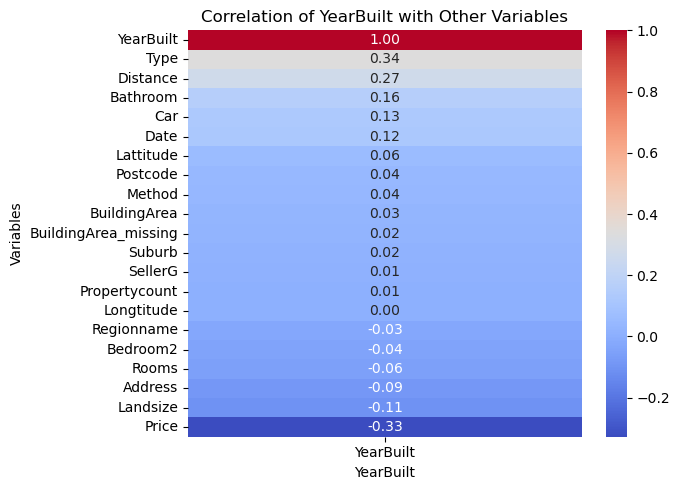

In [31]:
# Compute correlation matrix and visualize correlations with 'YearBuilt'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['YearBuilt']].sort_values(by='YearBuilt', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of YearBuilt with Other Variables')
plt.xlabel('YearBuilt')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

As 'YearBuilt' does not correlate with any other variables over the threshold of 0.25 which would lead to impution with predictors that have a weak or no relationship with 'YearBuilt', and thus lead to values that are not meaningful or accurate. 

Hence, we proceed with other forms of imputation and check for variability across regions.

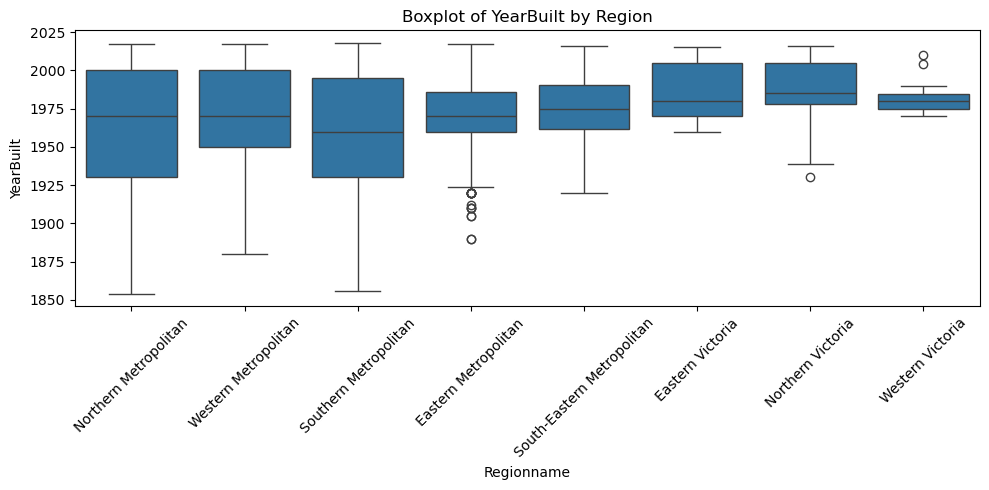

In [32]:
# Boxplot for YearBuilt by Region to check for vraince between the different Regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Regionname', y='YearBuilt', data=housing_data)
plt.xticks(rotation=45)
plt.title('Boxplot of YearBuilt by Region')
plt.xlabel('Regionname')
plt.ylabel('YearBuilt')
plt.tight_layout()
plt.show()

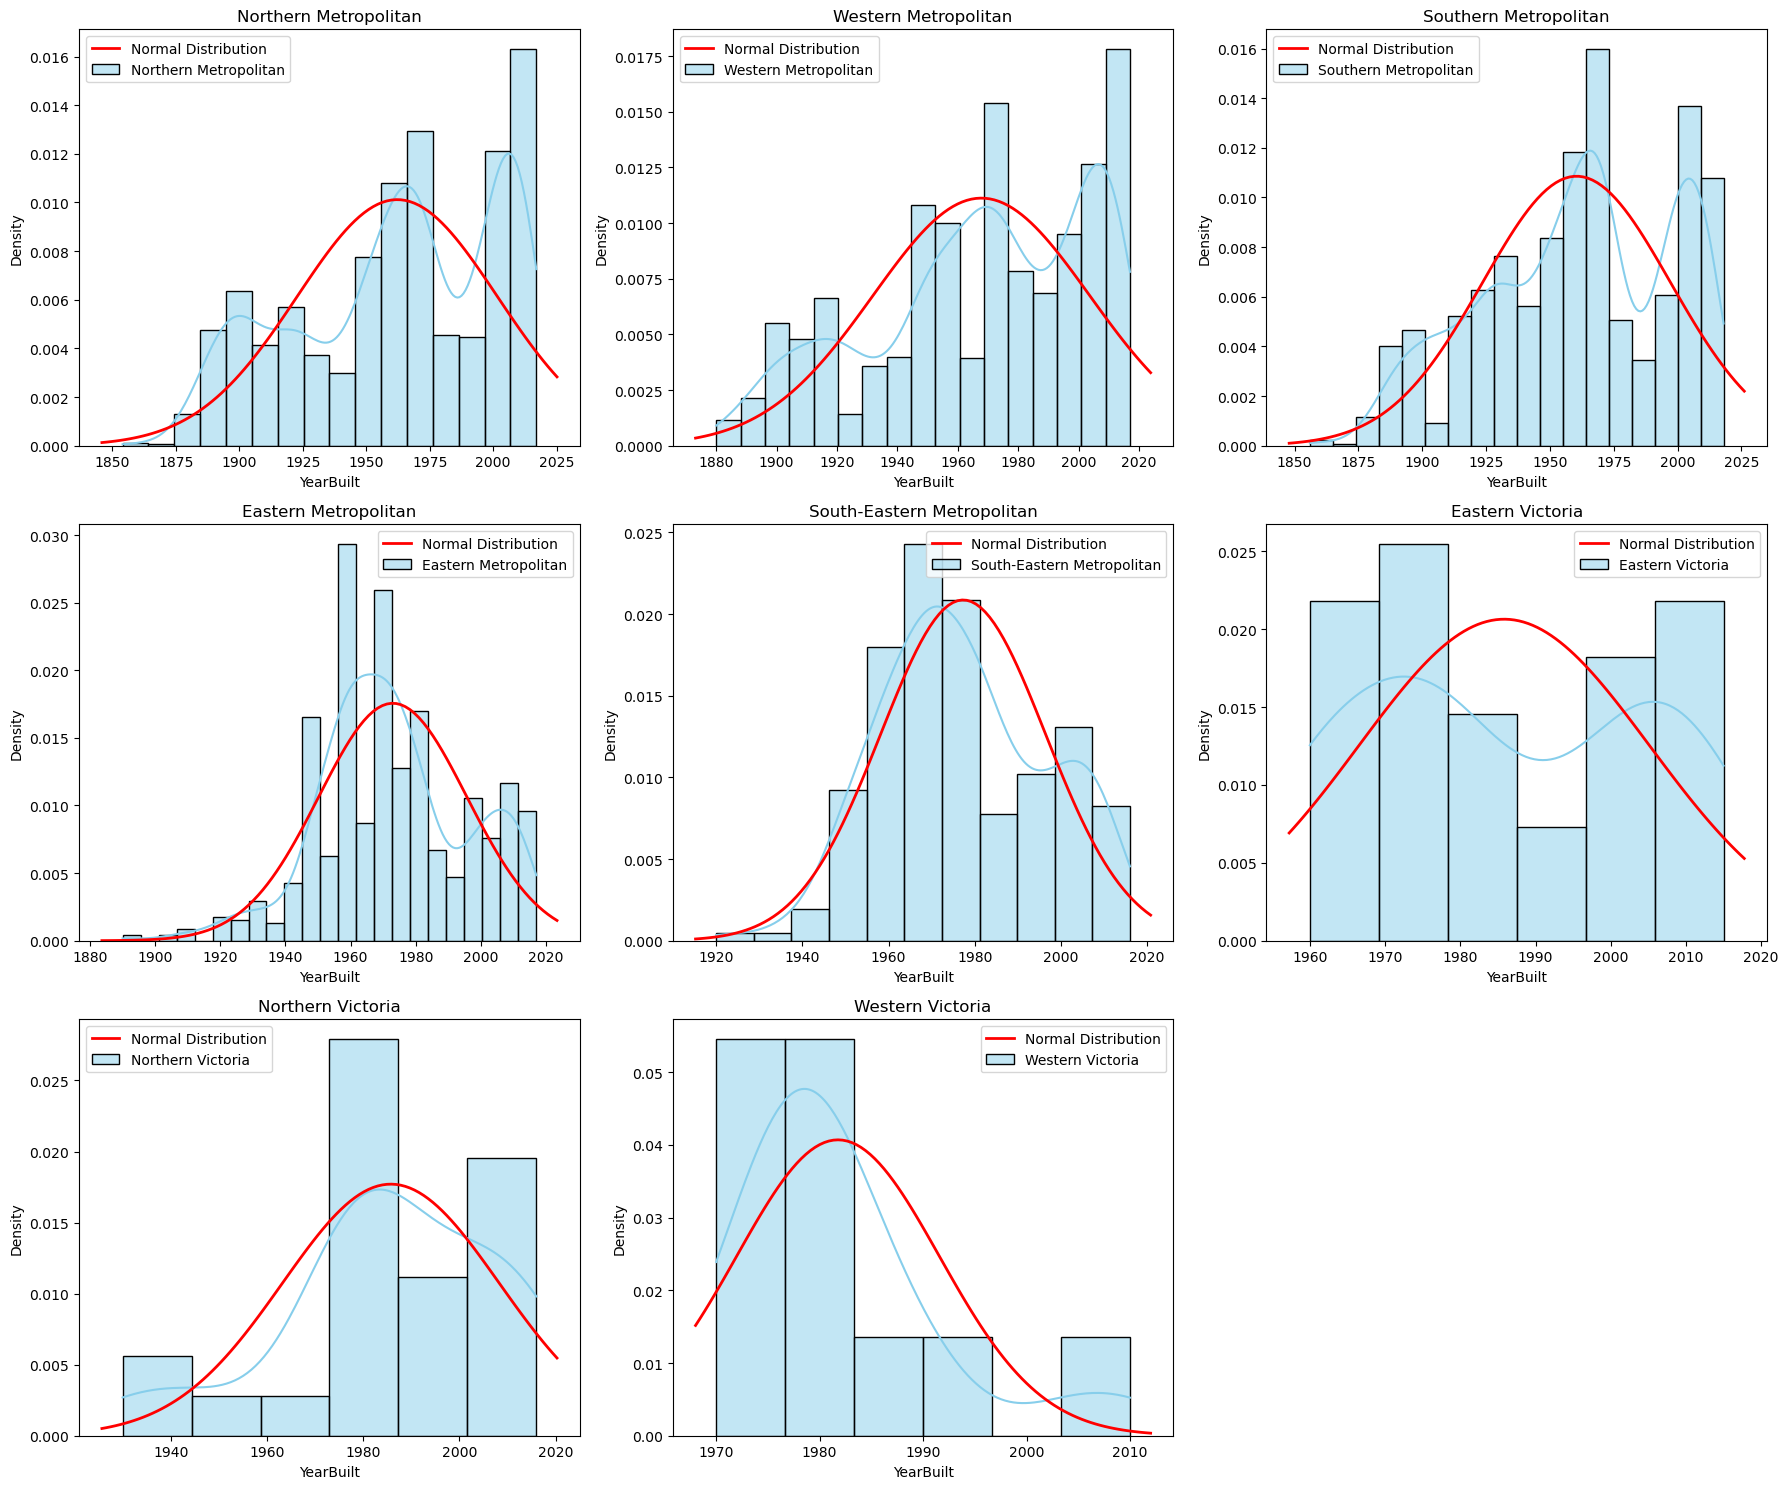

In [33]:
# Check if YearBuilt follows a Normal distirbution
# Group the data by 'Regionname' and prepare for subplots
regions = housing_data['Regionname'].unique()
num_regions = len(regions)

# Determine the number of rows and columns for subplots
rows = int(np.ceil(num_regions / 3))
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    # Filter data for the specific region and drop missing YearBuilt values
    region_data = housing_data[housing_data['Regionname'] == region]['YearBuilt'].dropna()
    
    if region_data.empty:
        ax.set_title(f"{region} - No Data")
        ax.axis('off')
        continue

    # Plot histogram and normal distribution
    sns.histplot(region_data, kde=True, stat="density", color='skyblue', ax=ax, label=f"{region}")
    
    # Plot normal distribution
    mean = region_data.mean()
    std = region_data.std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2, label="Normal Distribution")
    ax.set_title(f"{region}")
    ax.legend()

# Remove empty subplots if regions are fewer than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



We can see from the plots that 'YearBuilt' does not follow a normal distribution within each region. Thus we can not impute 'YearBuilt' by drawing at random from a normal distribution. As variability within the variable is still important, we sample directly sample from the existing observed values in each region. This method ensures that the imputed values align with the actual distribution of 'YearBuilt' within each region, regardless of its shape.

In [34]:
def random_impute_by_region(data, region_col, yearbuilt_col):
    for region in data[region_col].unique():
        # Filter non-missing values of YearBuilt for the current region
        region_data = data[data[region_col] == region][yearbuilt_col].dropna()
        
        # Check if there are non-missing values to sample from
        if not region_data.empty:
            # Count the number of missing values in YearBuilt for the current region
            missing_count = data[(data[region_col] == region) & (data[yearbuilt_col].isnull())].shape[0]
            
            # Randomly sample values from the existing distribution
            imputed_values = np.random.choice(region_data, missing_count, replace=True)
            
            # Fill the missing values with the sampled values
            data.loc[(data[region_col] == region) & (data[yearbuilt_col].isnull()), yearbuilt_col] = imputed_values

# Apply the function to the housing data
random_impute_by_region(housing_data, 'Regionname', 'YearBuilt')

# Check for remaining missing values
print("Remaining Missing Values in YearBuilt:")
print(housing_data['YearBuilt'].isnull().sum())


Remaining Missing Values in YearBuilt:
0


#### BuildingArea

Similarly to 'YearBuilt' our analysis suggests that 'BuildingArea' is MAR. Thus, we will also firt investigate the variables correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

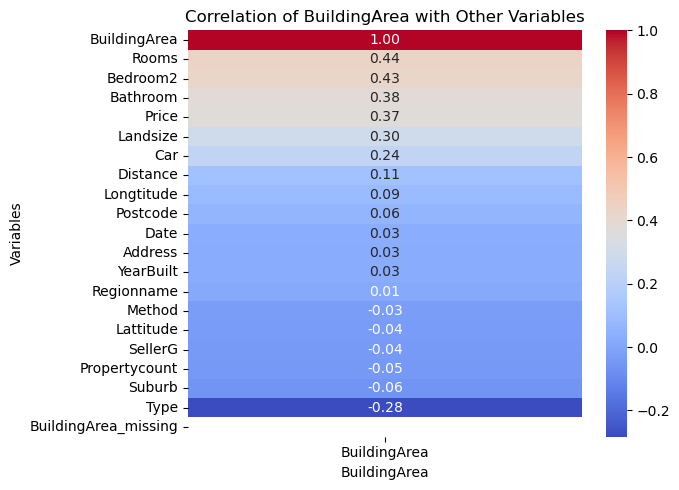

In [35]:
# Compute correlation matrix and visualize correlations with 'BuildingArea'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['BuildingArea']].sort_values(by='BuildingArea', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of BuildingArea with Other Variables')
plt.xlabel('BuildingArea')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

We can see that 'BuildingArea' correlates with five other variables, namely 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type', above the threshold of 0.25. Thus, we will continue to use KNN to impute missing values for 'BuildingArea'.

**K-Nearest Neighbors (KNN) Imputation** <br>

Firstly, we perform an optimization to find the optimal number of K neighbors to use.

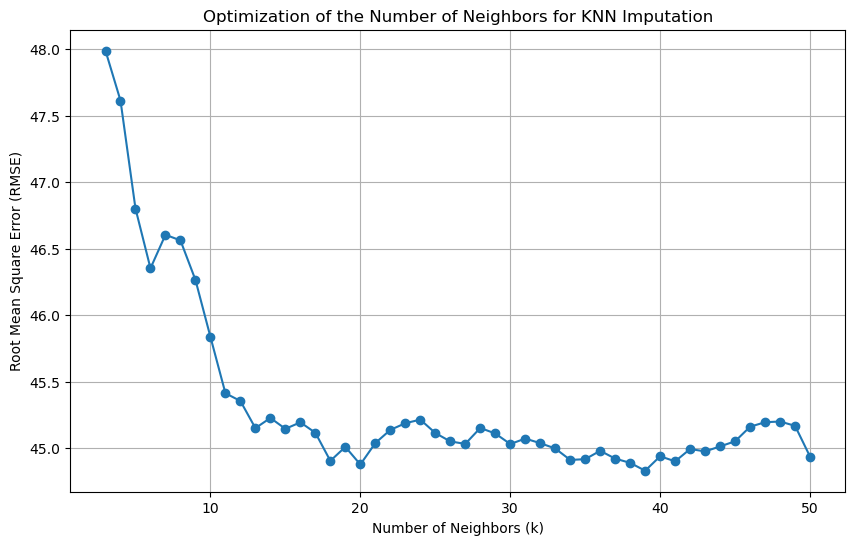

Optimal number of neighbors: 39


In [37]:
# Imputation of BuildingArea using KNN - using variables with a correlation of >= 0.25 (except price)
# Select relevant columns for testing imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Remove rows with missing values for testing
complete_data = housing_data_encoded.dropna(subset=columns_for_imputation)

# Split into train and test
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# Introduce artificial missingness in the 'BuildingArea' column for testing
test_data_missing = test_data.copy()
mask = np.random.rand(len(test_data)) < 0.3  # Mask 30% of the values
test_data_missing.loc[mask, 'BuildingArea'] = np.nan

# Optimize n_neighbors
errors = []
n_neighbors_range = range(3, 51)

for k in n_neighbors_range:
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_data = knn_imputer.fit_transform(test_data_missing[columns_for_imputation])
    
    # Calculate error
    imputed_values = imputed_data[:, 0]  # Imputed 'BuildingArea'
    true_values = test_data['BuildingArea'].values
    error = root_mean_squared_error(true_values, imputed_values)
    errors.append(error)

# Plot errors to find the optimal n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, errors, marker='o')
plt.title("Optimization of the Number of Neighbors for KNN Imputation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.grid()
plt.show()

# Best n_neighbors
best_k = n_neighbors_range[np.argmin(errors)]
print(f"Optimal number of neighbors: {best_k}")



Using the optimal numbers of neigbors K we impute the missing values in 'BuildingArea'.

In [38]:
# Use KNN to impute BuildingArea based on variables with a correlation threshold of >= 0.25 (except Price)
# Select relevant columns for imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns to include in KNN
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Apply KNN imputation to selected columns
knn_imputer = KNNImputer(n_neighbors=best_k)
imputed_data = knn_imputer.fit_transform(housing_data_encoded[columns_for_imputation])

# Update the original DataFrame with imputed values
housing_data.loc[:, 'BuildingArea'] = imputed_data[:, 0]

# Check for remaining missing values in 'BuildingArea'
print("Remaining Missing Values in BuildingArea:")
print(housing_data['BuildingArea'].isnull().sum())


Remaining Missing Values in BuildingArea:
0


After handling the missing data in all four columns, we perform a final check to confirm that there are in fact no  missing values left in our data set.


In [39]:
print("\nPost-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


Post-Cleaning Missing Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


### 1.2 Other Data Cleaning

In [40]:
# Check for invalid entires in Landsize (where Landsize = 0)
landsizes_equal_zero = (housing_data['Landsize'] == 0).sum()
print(f"Number of Landsize values equal to 0: {landsizes_equal_zero}")

Number of Landsize values equal to 0: 1937


In [41]:
# Update Landsize to be equal to BuildingArea where Landsize is 0
housing_data.loc[housing_data['Landsize'] == 0, 'Landsize'] = housing_data['BuildingArea']
housing_data[['BuildingArea', 'Landsize']]

BuildingArea  Landsize
0        119.069231     202.0
1         79.000000     156.0
2        150.000000     134.0
3         99.512821      94.0
4        142.000000     120.0
...             ...       ...
13202    197.575641     652.0
13203    133.000000     333.0
13204    158.641026     436.0
13205    157.000000     866.0
13206    112.000000     362.0

[13148 rows x 2 columns]

In [42]:
# Dropping unnecessary columns
columns_to_drop = ['Land_price_per_m2', 'Building_and_land_price_per_m2']
housing_data = housing_data.drop(columns=columns_to_drop, errors='ignore')

## 2. Exploratory Data Analysis (EDA)

In [58]:
# Get an overview of the cleaned dataset
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13148 entries, 0 to 13206
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Suburb                13148 non-null  object        
 1   Address               13148 non-null  object        
 2   Rooms                 13148 non-null  int64         
 3   Type                  13148 non-null  object        
 4   Price                 13148 non-null  float64       
 5   Method                13148 non-null  object        
 6   SellerG               13148 non-null  object        
 7   Date                  13148 non-null  datetime64[ns]
 8   Distance              13148 non-null  float64       
 9   Postcode              13148 non-null  Int64         
 10  Bedroom2              13148 non-null  Int64         
 11  Bathroom              13148 non-null  Int64         
 12  Car                   13148 non-null  Int64         
 13  Landsize             

## Correlation Matrix

In [45]:
numeric_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                   'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
categorical_columns = ['Type', 'Method', 'SellerG']

# Numeric vs Numeric Correlation
numeric_correlation = housing_data[numeric_columns].corr()

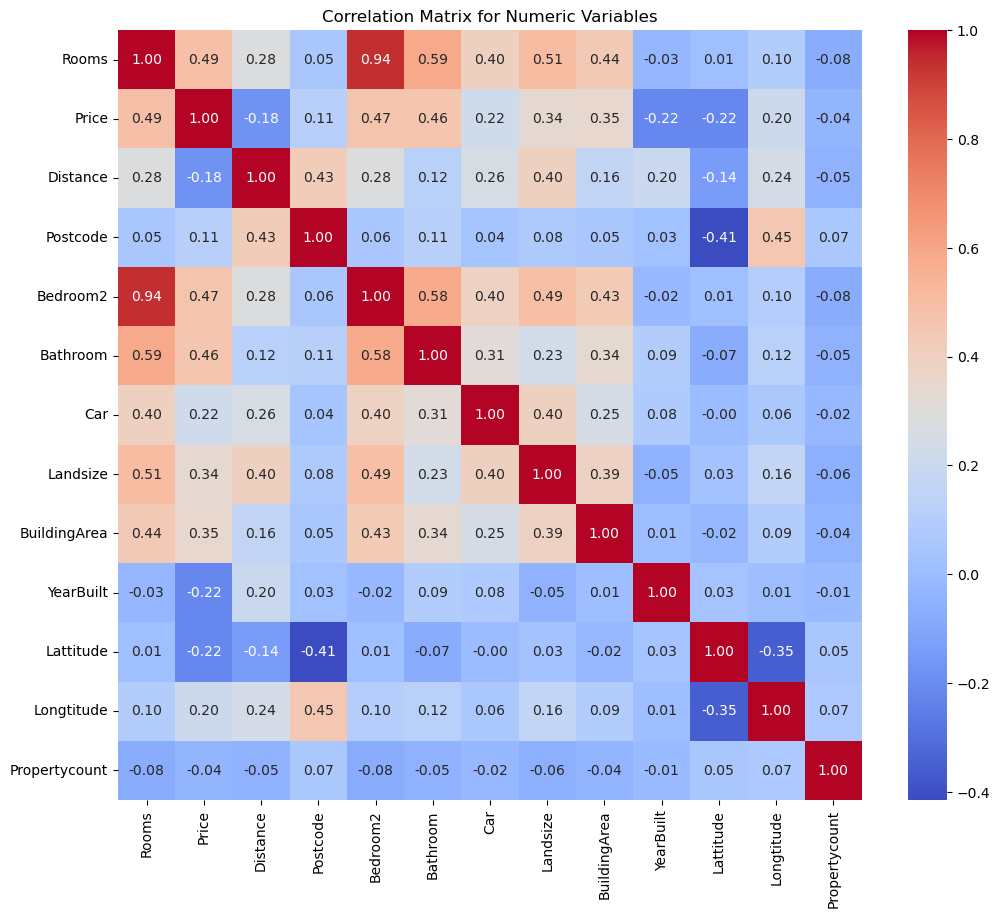

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

#### Highly correlated variables - **over the threshold of 0.5**

In [47]:
# Find pairs of variables with high correlation
threshold = 0.5

high_correlation = (numeric_correlation.abs() >= threshold)

high_corr_pairs = [
    (var1, var2) for var1 in high_correlation.index for var2 in high_correlation.columns
    if high_correlation.loc[var1, var2] and var1 != var2
]


high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)


high_corr_pairs_sorted = sorted(list(high_corr_pairs))
high_corr_pairs_sorted

[('Bathroom', 'Bedroom2'),
 ('Bathroom', 'Rooms'),
 ('Bedroom2', 'Rooms'),
 ('Landsize', 'Rooms')]

## Regional Price Analysis

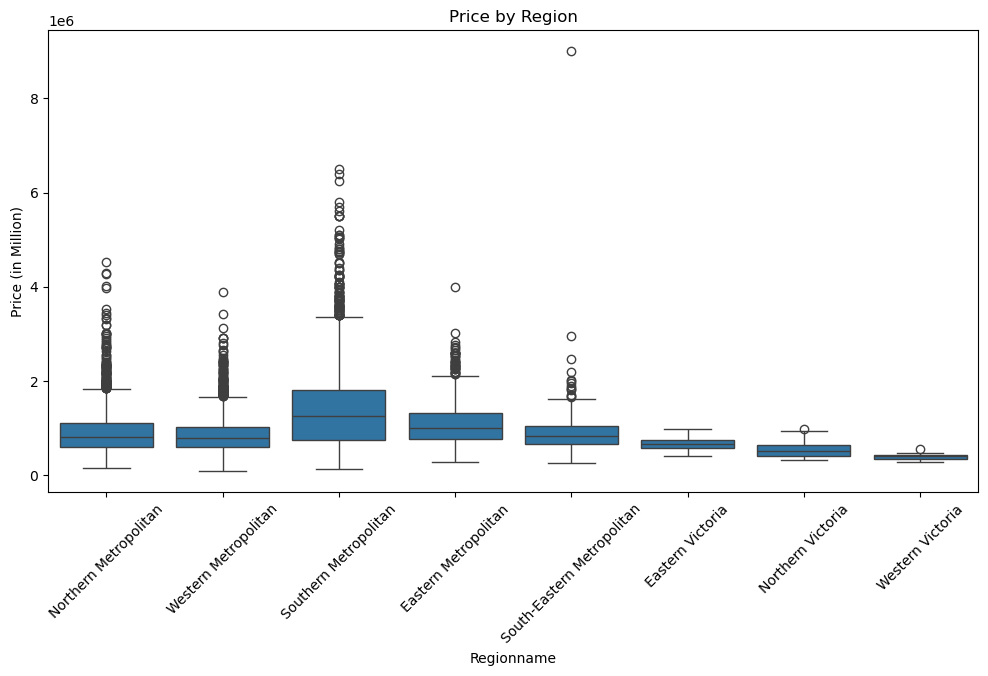

In [48]:
# Boxplots by Regions
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Regionname', y = 'Price', data = housing_data)
plt.xticks(rotation = 45)
plt.title("Price by Region")
plt.ylabel('Price (in Million)')
plt.show()

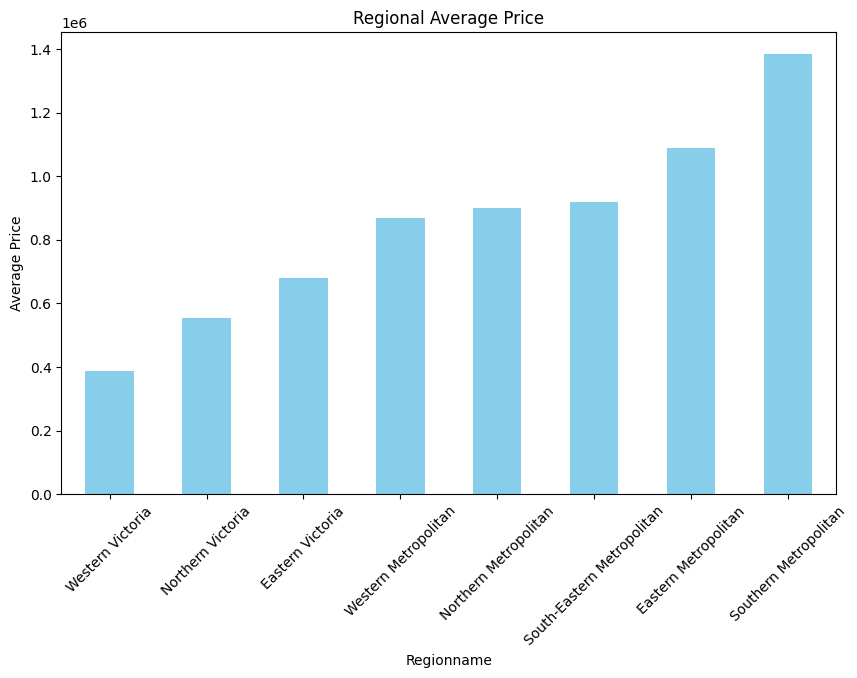

In [ ]:
# Barplot of average price per region
# Group by region and calculate mean price per sqm
region_avg = data.groupby('Regionname')['Price'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.title("Regional Average Price")
plt.xticks(rotation=45)
plt.show()

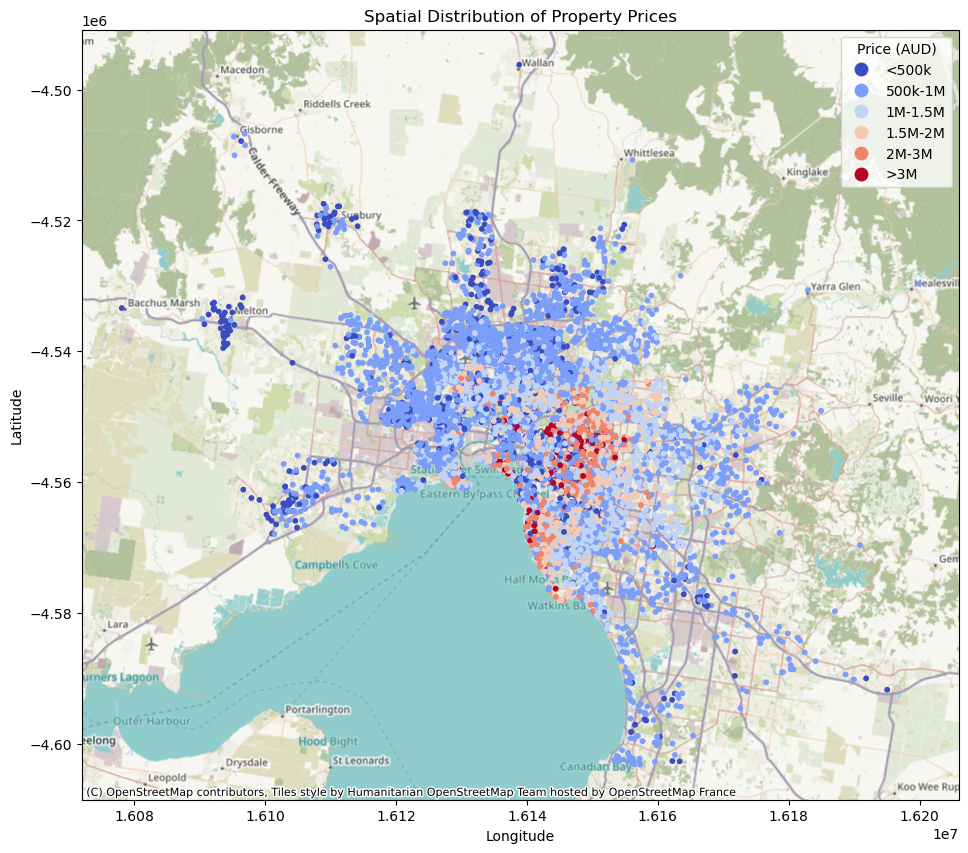

In [49]:
# Spatial Distribution of Property Prices
# Filter valid data for mapping
geo_data = housing_data[['Lattitude', 'Longtitude', 'Price']]
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Categorize prices into ranges (bins)
price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, gdf['Price'].max()]
price_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-3M', '>3M']
gdf['Price Range'] = pd.cut(gdf['Price'], bins=price_bins, labels=price_labels)

# Plot the map with categorized price ranges
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Price Range', legend=True, cmap='coolwarm', markersize=10, categorical=True)

# Add title to the legend
legend = ax.get_legend()
legend.set_title("Price (AUD)")

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

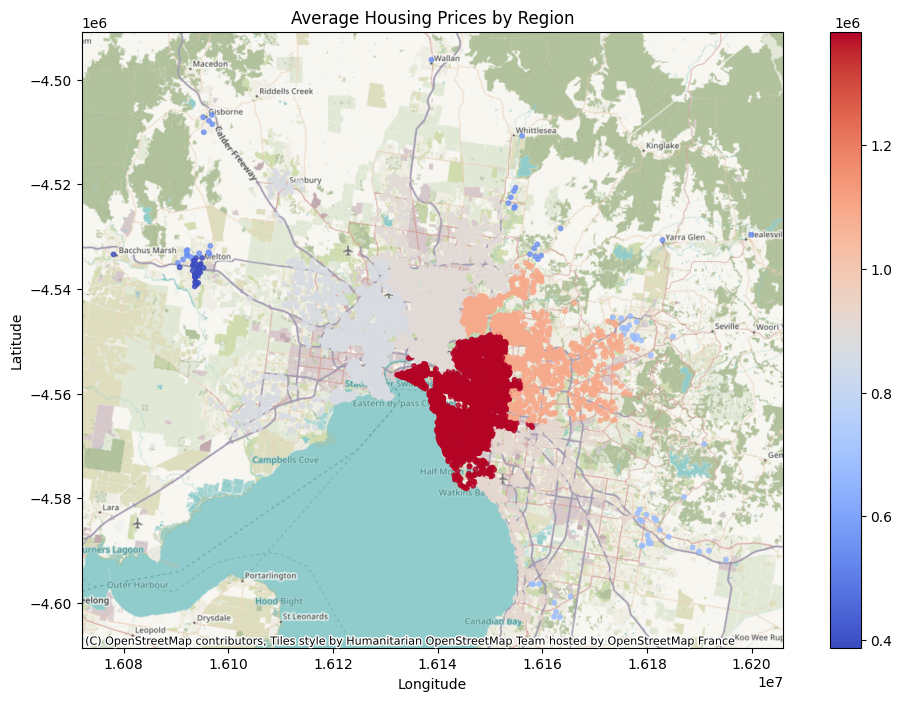

In [ ]:
# Step 2: Data cleaning
# Drop rows with missing values in critical columns
filtered_data = data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 3: Calculate the average price per region
average_price_per_region = filtered_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 4: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 5: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326")  # WGS 84 Coordinate Reference System


# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Step 7: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=10, alpha=0.8)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [51]:
# Filter properties that are closest to the CBD (e.g., within 1 km)
cbd_properties = housing_data[housing_data['Distance'] <= 1]

# Calculate the average latitude and longitude of these properties
cbd_latitude = cbd_properties['Lattitude'].mean()
cbd_longitude = cbd_properties['Longtitude'].mean()

print(f"Latitude of CBD: {cbd_latitude}")
print(f"Longitude of CBD: {cbd_longitude}")

Latitude of CBD: -37.818399
Longitude of CBD: 144.963525


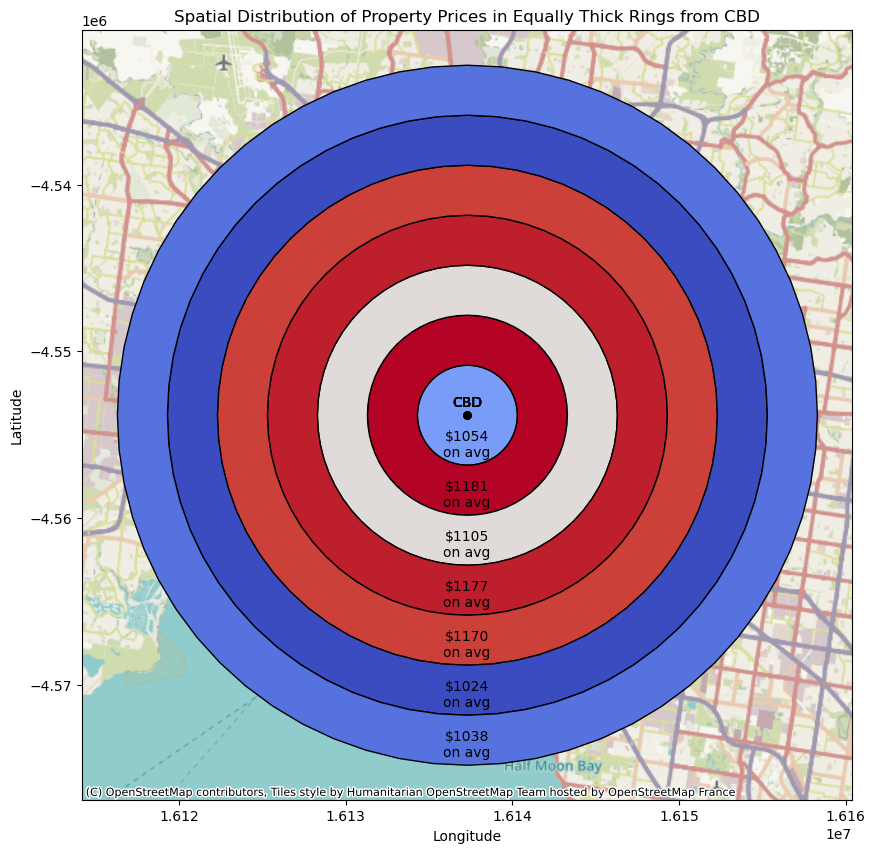

In [52]:
# Define the CBD point
cbd_point = Point(cbd_longitude, cbd_latitude)

# Define the distance intervals (in km) for equally thick rings
ring_thickness = 3  # Thickness of each ring in km
num_rings = 7  # Number of rings
distance_intervals = [ring_thickness * (i + 1) for i in range(num_rings)]

# Create a GeoDataFrame for the CBD point
cbd_gdf = gpd.GeoDataFrame([{'geometry': cbd_point}], crs="EPSG:4326")

# Reproject to a metric CRS (e.g., EPSG:3857) for distance calculations
cbd_gdf = cbd_gdf.to_crs(epsg=3857)
cbd_point_metric = cbd_gdf.geometry.iloc[0]

# Create rings around the CBD point
rings = []
for i, dist in enumerate(distance_intervals):
    if i == 0:
        inner_buffer = cbd_point_metric.buffer(0)  # Inner buffer is just the point itself
    else:
        inner_buffer = cbd_point_metric.buffer(distance_intervals[i-1] * 1000)  # Convert km to meters
    outer_buffer = cbd_point_metric.buffer(dist * 1000)  # Convert km to meters
    ring = outer_buffer.difference(inner_buffer)
    rings.append(ring)

# Create a GeoDataFrame for the rings
rings_gdf = gpd.GeoDataFrame(geometry=rings, crs="EPSG:3857")

# Reproject the property data to the same CRS
gdf = gdf.to_crs(epsg=3857)

# Calculate the average price within each ring
average_prices = []
for ring in rings:
    properties_in_ring = gdf[gdf.geometry.within(ring)]
    average_price = properties_in_ring['Price'].mean()
    average_prices.append(average_price)

# Create a color map based on the average prices
norm = plt.Normalize(vmin=min(average_prices), vmax=max(average_prices))
cmap = plt.cm.coolwarm

# Plot the rings with the corresponding colors
fig, ax = plt.subplots(figsize=(12, 10))
for ring, avg_price in zip(rings, average_prices):
    color = cmap(norm(avg_price))
    ring_gdf = gpd.GeoDataFrame(geometry=[ring], crs="EPSG:3857")
    ring_gdf.plot(ax=ax, edgecolor='black', facecolor=color, linewidth=1)
    # Get the centroid of the ring for labeling
    centroid = ring.centroid
    # Get the bounds of the ring for labeling
    minx, miny, maxx, maxy = ring.bounds
    label_x = (minx + maxx) / 2
    label_y = miny + 500  # Offset the label position slightly below the ring
    rounded_price = round(avg_price / 1000)  # Round to the nearest thousand
    ax.text(label_x, label_y, f"${rounded_price}\non avg", fontsize=10, ha='center', color='black')
    # Plot the CBD point
    cbd_gdf.plot(ax=ax, color='black', markersize=25, label='CBD')
    for x, y, label in zip(cbd_gdf.geometry.x, cbd_gdf.geometry.y, ['CBD']):
        ax.text(x, y + 500, label, fontsize=10, ha='center')  # Adjust y position slightly higher


# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)

# Add title and labels
plt.title("Spatial Distribution of Property Prices in Equally Thick Rings from CBD")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Marginal relationship between Price and Rooms, Bathrooms, Landsize, and Distance from CBD

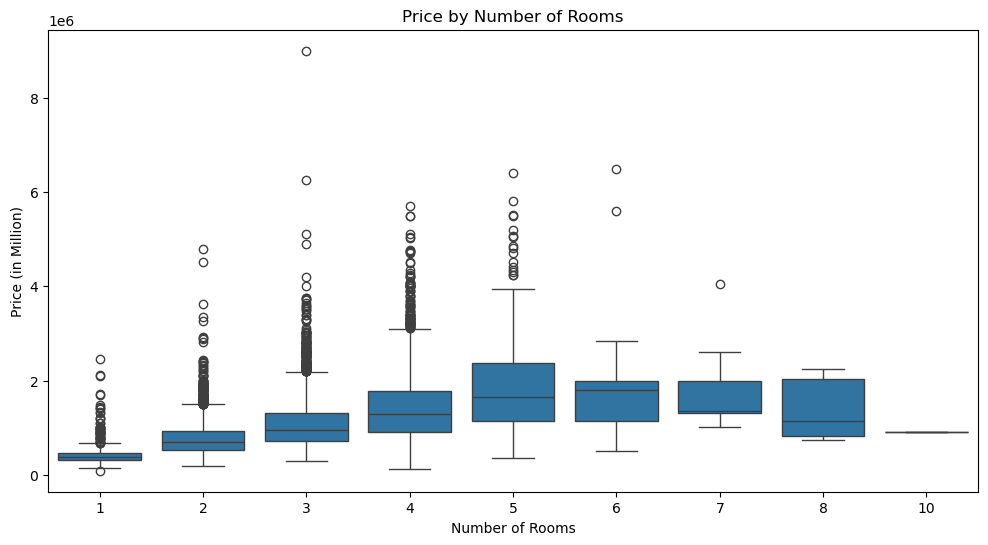

In [53]:
# Boxplots by Number of Rooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rooms', y='Price', data = housing_data)
plt.title("Price by Number of Rooms")
plt.xlabel('Number of Rooms')
plt.ylabel('Price (in Million)')
plt.show()

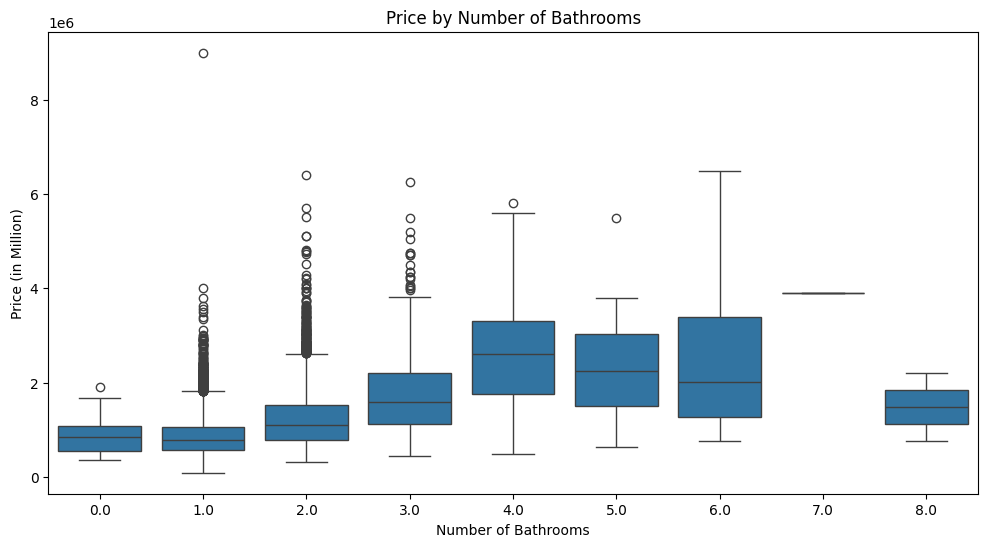

In [ ]:
# Boxplots by Number of Bathrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bathroom', y='Price', data=data)
plt.title("Price by Number of Bathrooms")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Million)')
plt.show()

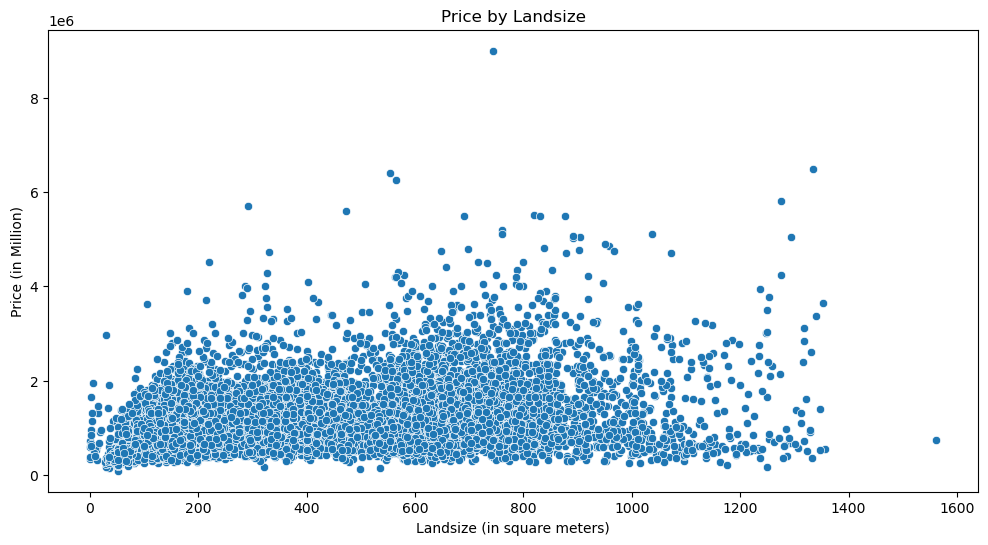

In [54]:
# Boxplot by Landsize
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Landsize', y='Price', data = housing_data)
plt.title("Price by Landsize")
plt.xlabel('Landsize (in square meters)')
plt.ylabel('Price (in Million)')
plt.show()

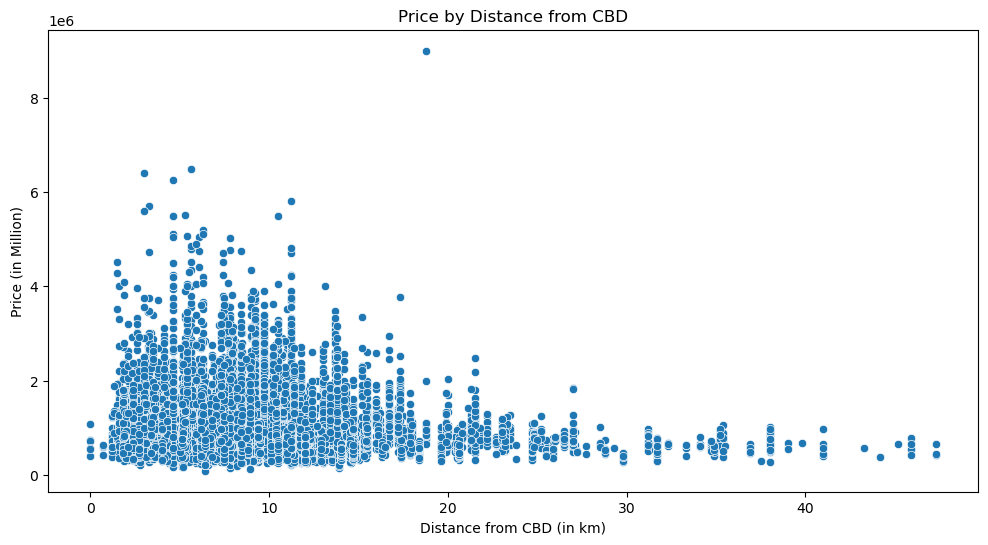

In [55]:
# Scatterplot Distance from CBD
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance', y='Price', data = housing_data)
plt.title("Price by Distance from CBD")
plt.xlabel('Distance from CBD (in km)')
plt.ylabel('Price (in Million)')
plt.show()

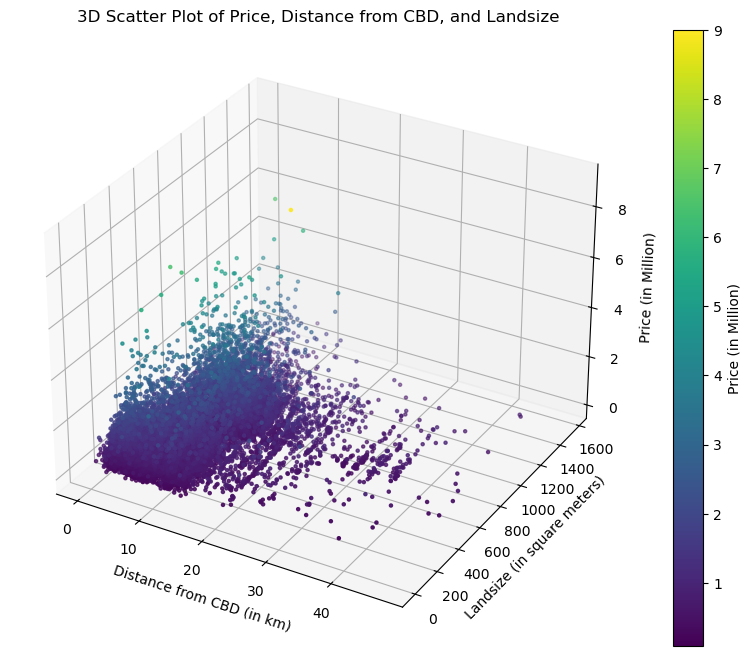

In [56]:
# 3D Scatter Plot of Price, Distance from CBD, and Landsize
# Filter out rows with missing Landsize values
filtered_data = housing_data.dropna(subset=['Landsize'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with even smaller points
sc = ax.scatter(filtered_data['Distance'], filtered_data['Landsize'], filtered_data['Price'] / 1e6, c=filtered_data['Price'] / 1e6, cmap='viridis', s=5)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Price (in Million)')

# Set labels
ax.set_xlabel('Distance from CBD (in km)')
ax.set_ylabel('Landsize (in square meters)')
ax.set_zlabel('Price (in Million)')
ax.set_title('3D Scatter Plot of Price, Distance from CBD, and Landsize')

plt.show()